<a href="https://colab.research.google.com/github/monolixd/Ailearn/blob/main/ActivationAndLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. ตัวอย่างการใช้ Activation Functions ใน Dense Layer

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# สร้างโมเดลแบบ Sequential
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),  # ReLU
    Dense(32, activation='sigmoid'),                  # Sigmoid
    Dense(10, activation='softmax')                   # Softmax
])

# แสดงสรุปโมเดล
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,874 (34.66 KB)

 Trainable params: 8,874 (34.66 KB)

 Non-trainable params: 0 (0.00 B)

Output นี้แสดง Summary ของโครงสร้างโมเดล Neural Network โดยอธิบายลักษณะของแต่ละเลเยอร์ในโมเดล และจำนวนพารามิเตอร์ที่ใช้ในการเทรนโมเดล โดยมีรายละเอียดดังนี้:

Column 1: Layer (type)

แสดงชื่อเลเยอร์และประเภทเลเยอร์ที่ใช้ (ในที่นี้ใช้ Dense layers ทั้งหมด ซึ่งเป็น Fully Connected Layers)
Column 2: Output Shape

แสดงขนาดของ Output ที่ได้จากแต่ละเลเยอร์
(None, 64) หมายถึง ข้อมูลมี 64 units/output neurons (ค่า None คือ Batch Size ที่สามารถปรับเปลี่ยนได้)
Column 3: Param #

แสดงจำนวนพารามิเตอร์ (Parameters) ที่ใช้ในแต่ละเลเยอร์
จำนวนนี้คิดจากการคูณระหว่าง input features และ output neurons รวมกับ bias parameters
ตัวอย่าง:
Dense (64 units): (input_features + 1) * output_units = (100 + 1) * 64 = 6,464
Dense_1 (32 units): (64 + 1) * 32 = 2,080
Dense_2 (10 units): (32 + 1) * 10 = 330
Summary ของพารามิเตอร์

Total params: จำนวนพารามิเตอร์ทั้งหมดในโมเดล = 8,874
Trainable params: จำนวนพารามิเตอร์ที่สามารถปรับปรุงได้ผ่านการเทรน = 8,874
Non-trainable params: พารามิเตอร์ที่ไม่ถูกปรับในระหว่างการเทรน (ไม่มีในโมเดลนี้ = 0)

## 2. การใช้ Activation Functions แบบกำหนดเอง

In [2]:
from tensorflow.keras import activations

# ใช้ Activation Function ในโค้ดแบบกำหนดเอง
relu_output = activations.relu([-3.0, 0.0, 3.0])  # ค่า Output: [0.0, 0.0, 3.0]
sigmoid_output = activations.sigmoid([-3.0, 0.0, 3.0])  # ค่า Output: [0.047, 0.5, 0.952]
print("ReLU Output:", relu_output.numpy())
print("Sigmoid Output:", sigmoid_output.numpy())

ReLU Output: [0. 0. 3.]
Sigmoid Output: [0.04742587 0.5        0.95257413]


activations.relu: แปลงค่าที่น้อยกว่า 0 ให้เป็น 0<br>
activations.sigmoid: แปลงค่าทั้งหมดให้อยู่ในช่วง (0, 1)

## 3. การเพิ่ม Activation Functions แบบเลเยอร์ในโมเดล

In [3]:
from tensorflow.keras.layers import Activation

# เพิ่ม Activation Function โดยใช้ Activation Layer
model = Sequential([
    Dense(64, input_shape=(100,)),   # เลเยอร์ปกติ (ไม่มี Activation)
    Activation('relu'),              # เพิ่มเลเยอร์ Activation
    Dense(32),
    Activation('tanh')               # ใช้ Tanh เป็น Activation Function
])

# แสดงสรุปโมเดล
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,544 (33.38 KB)

 Trainable params: 8,544 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

## 4. ใช้ Activation Functions ในฟังก์ชันเอง (Functional API)

In [4]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

# ใช้ Functional API สร้างโมเดล
inputs = Input(shape=(100,))
x = Dense(64)(inputs)
x = tf.keras.activations.relu(x)  # ใช้ ReLU แบบกำหนดเอง
x = Dense(32)(x)
x = tf.keras.activations.sigmoid(x)  # ใช้ Sigmoid แบบกำหนดเอง
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# แสดงสรุปโมเดล
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sigmoid (Sigmoid)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,874 (34.66 KB)

 Trainable params: 8,874 (34.66 KB)

 Non-trainable params: 0 (0.00 B)

คุณสามารถใช้ Activation Functions แบบกำหนดเองในแต่ละเลเยอร์ได้<br>
เหมาะสำหรับโมเดลที่ซับซ้อน

## 5. การเปรียบเทียบ Activation Functions ด้วยกราฟ
เพื่อให้เห็นผลลัพธ์ของ Activation Functions ชัดเจน เราสามารถสร้างกราฟเปรียบเทียบได้:

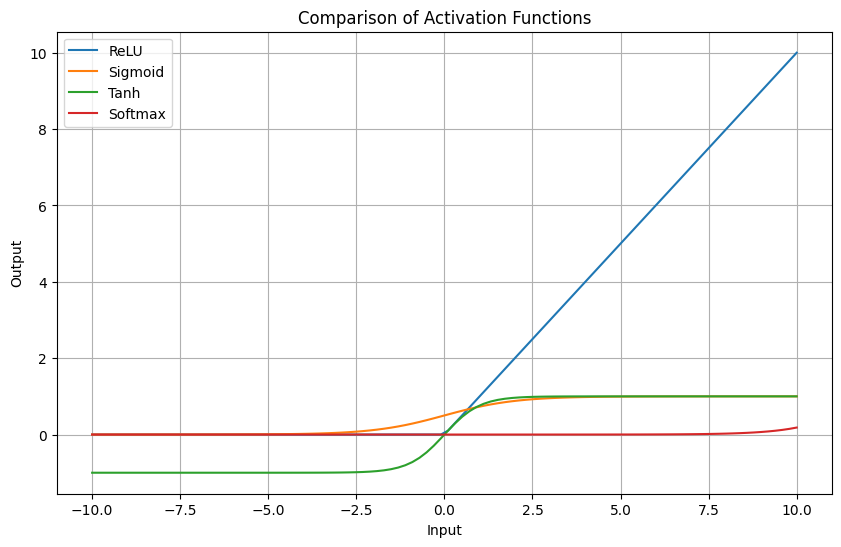

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ค่าของ x
x = np.linspace(-10, 10, 100)

# คำนวณค่า Activation Functions
relu = tf.keras.activations.relu(x)
sigmoid = tf.keras.activations.sigmoid(x)
tanh = tf.keras.activations.tanh(x)
softmax = tf.keras.activations.softmax(x.reshape(1, -1)).numpy().flatten()

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.plot(x, relu, label='ReLU')
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, tanh, label='Tanh')
plt.plot(x, softmax, label='Softmax')
plt.title("Comparison of Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()